## Import Relevant Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Loading Data

In [2]:
df = pd.read_csv(r'D:\Job_Assignments\assignment_4\assignment-data.csv',index_col = 'datetime')

## See the structure of the data without printing the entire dataframe

In [3]:
df.head()

,Unnamed: 0,load,apparent_temperature,temperature,humidity,dew_point,wind_speed,cloud_cover,date
datetime,,,,,,,,,
2018-01-01 00:00:00,0,803.22270,10.45800,10.45800,0.955500,8.946000,0.0,0.0,2018-01-01
2018-01-01 00:15:00,1,774.89523,10.32675,10.32675,0.961625,8.911875,0.0,0.0,2018-01-01
2018-01-01 00:30:00,2,731.46927,10.19550,10.19550,0.967750,8.877750,0.0,0.0,2018-01-01
2018-01-01 00:45:00,3,713.93870,10.06425,10.06425,0.973875,8.843625,0.0,0.0,2018-01-01
2018-01-01 01:00:00,4,699.23007,9.93300,9.93300,0.980000,8.809500,0.0,0.0,2018-01-01


## We wont have any column other than load when predicting for 14/Dec thats why there is no need of printing any column.


In [4]:
df1 = df[['load']]
df1.head()

,load
datetime,
2018-01-01 00:00:00,803.22270
2018-01-01 00:15:00,774.89523
2018-01-01 00:30:00,731.46927
2018-01-01 00:45:00,713.93870
2018-01-01 01:00:00,699.23007


## Droping NaN Values

In [6]:
df1.dropna(how="any", inplace=True)

<ipython-input-6-c3f84814e83b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(how="any", inplace=True)


In [7]:
df1.isnull().sum()# Checking if there are still NaN values remaining

load    0
dtype: int64

## Creating New Columns For Making Predictions

In [8]:
df1['load_15min_before'] = df1['load'].shift(+1) # To create a column with one step ahead
df1['load_30min_before'] = df1['load'].shift(+2) # To create a column with two steps ahead
df1['load_45min_before'] = df1['load'].shift(+3) # To create a column with three steps ahead
df1.head()

<ipython-input-8-3c8aeb7dc410>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['load_15min_before'] = df1['load'].shift(+1)
<ipython-input-8-3c8aeb7dc410>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['load_30min_before'] = df1['load'].shift(+2)
<ipython-input-8-3c8aeb7dc410>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

,load,load_15min_before,load_30min_before,load_45min_before
datetime,,,,
2018-01-01 00:00:00,803.22270,NaN,NaN,NaN
2018-01-01 00:15:00,774.89523,803.22270,NaN,NaN
2018-01-01 00:30:00,731.46927,774.89523,803.22270,NaN
2018-01-01 00:45:00,713.93870,731.46927,774.89523,803.22270
2018-01-01 01:00:00,699.23007,713.93870,731.46927,774.89523


## Drop NaN values

In [9]:
df1.dropna(how="any", inplace=True)

<ipython-input-9-c3f84814e83b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(how="any", inplace=True)


In [10]:
df1.head()

,load,load_15min_before,load_30min_before,load_45min_before
datetime,,,,
2018-01-01 00:45:00,713.93870,731.46927,774.89523,803.22270
2018-01-01 01:00:00,699.23007,713.93870,731.46927,774.89523
2018-01-01 01:15:00,684.37600,699.23007,713.93870,731.46927
2018-01-01 01:30:00,679.37650,684.37600,699.23007,713.93870
2018-01-01 01:45:00,671.21570,679.37650,684.37600,699.23007


## Importing Sklearn for Prediction on the basis of LinearRegression 

In [11]:
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()

In [12]:
# THIS IS TO CONVERT COLUMNS INTO NP ARRAY

x1 = df1['load_15min_before'].values
x2 = df1['load_30min_before'].values
x3 = df1['load_45min_before'].values
y = df1['load'].values

## Convert Columns into np array

In [14]:
x1 =  x1.reshape(-1,1)
x2 = x2.reshape(-1,1)
x3 = x3.reshape(-1,1)
y = y.reshape(-1,1)
fin_x = np.concatenate((x1,x2,x3),axis = 1)
fin_x

array([[731.46927, 774.89523, 803.2227 ],
       [713.9387 , 731.46927, 774.89523],
       [699.23007, 713.9387 , 731.46927],
       ...,
       [832.24   , 858.5    , 896.88   ],
       [804.97   , 832.24   , 858.5    ],
       [763.56   , 804.97   , 832.24   ]])

## Training and Testing

In [15]:
x_train,x_test,y_train,y_test = fin_x[:-20000],fin_x[-20000:],y[:-20000],y[-20000:]

In [16]:
from sklearn.metrics import mean_squared_error
from math import sqrt

## Fitting the model

In [17]:
lin_model.fit(x_train,y_train)

LinearRegression()

## Plotting Predicted Values and Actual Values

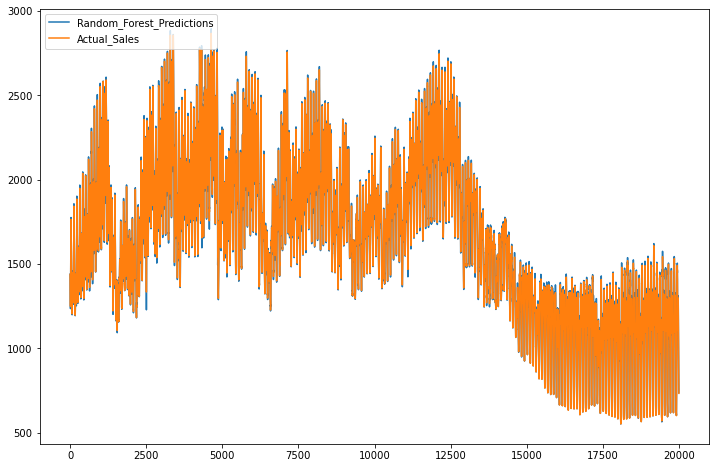

In [18]:
lin_pred = lin_model.predict(x_test)
plt.rcParams['figure.figsize'] = (12,8)
plt.plot(lin_pred,label = 'Linear_Regression_Predictions')
plt.plot(y_test,label = 'Actual_Sales')
plt.legend(loc = 'upper left')
plt.show()

## Checking for rms error to check the efficiency of model

In [19]:
rmse_lin = sqrt(mean_squared_error(lin_pred,y_test))
rmse_lin

16.010890366563032

In [20]:
lin_pred

array([[1440.62271694],
       [1434.45218556],
       [1416.05562407],
       ...,
       [ 809.517221  ],
       [ 786.03860687],
       [ 737.85587146]])

In [21]:
y_test

array([[1438.5935],
       [1424.1909],
       [1402.3143],
       ...,
       [ 804.97  ],
       [ 763.56  ],
       [ 734.27  ]])

## Looping To Get The Values Beyond 12/Dec

In [140]:
count_itr = 0

while count_itr < 193: # I PUT 193 BECAUSE THERE WERE TOTAL 48 * 4 = 192 ENTRIES TO BE FILLED 
    av = y[-1]
    x1 = np.append(x1,av) # LAST VALUE OF LOAD IS THE FIRST VALUE OF X1 AFTER THE 12/DEC/2020
    
    bv = y[-2]
    x2 = np.append(x2,bv) # SECOND-LAST VALUE OF LOAD IS THE FIRST VALUE OF X2 AFTER THE 12/DEC/2020
    
    tv = y[-3]
    x3 = np.append(x3,tv) # SAME REASON
    
    x1 =  x1.reshape(-1,1) # SKLEARN WORKS ATLEAST ON 2D
    x2 = x2.reshape(-1,1)
    x3 = x3.reshape(-1,1)
    
    # FIRST PREDICTED VALUE IS FIRST VALUE OF 'Y' AFTER GIVEN DATASET
    fin_x = np.concatenate((x1,x2,x3),axis = 1)
    x_train,x_test,y_train,y_test = fin_x[:-20000],fin_x[-20000:],y[:-20000],y[-20000:]
    lin_model.fit(x_train,y_train)
    lin_pred = lin_model.predict(x_test)
    
    mv = lin_pred[-1]
    y = np.append(y,mv)
    y = y.reshape(-1,1)
    count_itr += 1
    
    
    

In [142]:
len(y)

102146

In [143]:
type(y)

numpy.ndarray

## MAKING LOAD PREDICTION FOR 14/DEC/2020

In [148]:
dec14 = y[-96:].round(2) # WE PUT -96 BECAUSE LAST 96 ENTRIES ARE THE DATA OF THE ENTIRE DAY OF 14/DEC[24*4 = 96,4 is due to 15 mins]

In [170]:
column_values = ['forecast']
df_finl = pd.DataFrame(data = dec14, 
                  #index = index_values, 
                  columns = column_values)

In [171]:
df_finl

,forecast
0,1421.79
1,1424.47
2,1427.09
3,1429.64
4,1432.14
...,...
91,1524.00
92,1524.31
93,1524.62
94,1524.93


In [172]:
rng = pd.date_range('2020-12-14', periods=96, freq='15T')
df_tin = pd.DataFrame({ 'Date': rng})

In [173]:
df_tin.head()

,Date
0,2020-12-14 00:00:00
1,2020-12-14 00:15:00
2,2020-12-14 00:30:00
3,2020-12-14 00:45:00
4,2020-12-14 01:00:00


In [174]:
len(df_finl)

96

In [175]:
len(df_tin)

96

In [176]:
df_finl['datetime'] = df_tin['Date']

In [179]:
df_finl = df_finl[['datetime','forecast']]
df_finl.head()

,datetime,forecast
0,2020-12-14 00:00:00,1421.79
1,2020-12-14 00:15:00,1424.47
2,2020-12-14 00:30:00,1427.09
3,2020-12-14 00:45:00,1429.64
4,2020-12-14 01:00:00,1432.14


In [181]:
df_finl.set_index('datetime')

,forecast
datetime,
2020-12-14 00:00:00,1421.79
2020-12-14 00:15:00,1424.47
2020-12-14 00:30:00,1427.09
2020-12-14 00:45:00,1429.64
2020-12-14 01:00:00,1432.14
...,...
2020-12-14 22:45:00,1524.00
2020-12-14 23:00:00,1524.31
2020-12-14 23:15:00,1524.62


## CREATING A CSV FILE FOR PREDICTED LOAD ON 14/DEC/2020

In [184]:
df_finl.to_csv(r'D:\Job_Assignments\assignment_4\predicted_load.csv',index = False)

In [187]:
df_wnan = df[['load']] # COPYING DESIRED COLUMN FROM DATASET TO WORK ON NAN VALUES

In [188]:
df_wnan.head()

,load
datetime,
2018-01-01 00:00:00,803.22270
2018-01-01 00:15:00,774.89523
2018-01-01 00:30:00,731.46927
2018-01-01 00:45:00,713.93870
2018-01-01 01:00:00,699.23007


In [196]:
len(df_wnan)

103392

## FILLING NaN WITH MEAN OF PREVIOUS AND NEXT VALUES

In [194]:
filled_dataset = df_wnan.fillna(df_wnan.rolling(100000,min_periods=1).mean())

In [195]:
filled_dataset.isnull().sum()

load    0
dtype: int64

In [197]:
len(filled_dataset)

103392

In [226]:
nw_df = df[df.isnull().any(axis=1)]

In [227]:
len(nw_df)

1440

In [228]:
nw_df.head()

,Unnamed: 0,load,apparent_temperature,temperature,humidity,dew_point,wind_speed,cloud_cover,date
datetime,,,,,,,,,
2019-05-16 00:00:00,48000,NaN,31.458000,31.458000,0.441000,16.56900,0.1365,0.462,2019-05-16
2019-05-16 00:15:00,48001,NaN,31.371375,31.371375,0.443625,16.55325,0.1680,0.462,2019-05-16
2019-05-16 00:30:00,48002,NaN,31.284750,31.284750,0.446250,16.53750,0.1995,0.462,2019-05-16
2019-05-16 00:45:00,48003,NaN,31.198125,31.198125,0.448875,16.52175,0.2310,0.462,2019-05-16
2019-05-16 01:00:00,48004,NaN,31.111500,31.111500,0.451500,16.50600,0.2625,0.462,2019-05-16


In [229]:
nw_df = nw_df[['load']] 

In [230]:
nw_df.head()

,load
datetime,
2019-05-16 00:00:00,NaN
2019-05-16 00:15:00,NaN
2019-05-16 00:30:00,NaN
2019-05-16 00:45:00,NaN
2019-05-16 01:00:00,NaN


## GETTING ONLY THOSE VALUES WHICH CAME AT THE PLACES OF NaN

In [232]:
nw_df['load_val'] = filled_dataset['load']

In [233]:
nw_df.head()

,load,load_val
datetime,,
2019-05-16 00:00:00,1527.82129,1527.82129
2019-05-16 00:15:00,1527.82129,1527.82129
2019-05-16 00:30:00,1527.82129,1527.82129
2019-05-16 00:45:00,1527.82129,1527.82129
2019-05-16 01:00:00,1527.82129,1527.82129


In [235]:
nw_df.describe()

,load,load_val
count,1440.000000,1440.000000
mean,1582.217756,1582.217756
std,37.187018,37.187018
min,1527.821290,1527.821290
25%,1527.821290,1527.821290
50%,1586.989739,1586.989739
75%,1605.924913,1605.924913
max,1652.191900,1652.191900


## CREATING A CSV FILE FOR LOAD VALUES AT THE PLACE OF NaN

In [258]:
nw_df.to_csv(r'D:\Job_Assignments\assignment_4\Load_At_NaN.csv')